### https://coderzcolumn.com/tutorials/data-science/how-to-create-dashboard-using-python-matplotlib-panel

In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 32)

In [2]:
breast_cancer = load_breast_cancer()

print("Feature Names", breast_cancer.feature_names)
print("Target : ", breast_cancer.target_names)
print("Dataset Size : ", breast_cancer.data.shape)

breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df["Target"] = breast_cancer.target
breast_cancer_df["Target"] = ['Malignant' if typ==0 else 'Benign' for typ in breast_cancer_df["Target"]]
breast_cancer_df.head()

Feature Names ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target :  ['malignant' 'benign']
Dataset Size :  (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


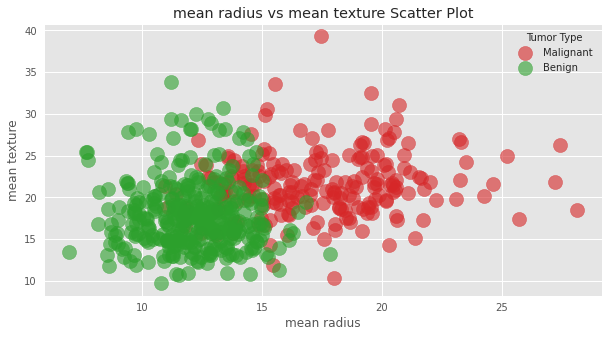

In [3]:
with plt.style.context(("seaborn","ggplot")):
    color = {"Malignant" : "tab:red", "Benign":"tab:green"}
    plt.figure(figsize=(10,5))
    for tumor_typ in breast_cancer_df["Target"].unique():
        plt.scatter(breast_cancer_df[breast_cancer_df["Target"]==tumor_typ]["mean radius"],
                    breast_cancer_df[breast_cancer_df["Target"]==tumor_typ]["mean texture"],
                    c=color[tumor_typ],
                    s=200,
                    alpha=0.6,
                    label=tumor_typ)
    plt.xlabel("mean radius")
    plt.ylabel("mean texture")
    plt.title("mean radius vs mean texture Scatter Plot")
    plt.legend(title="Tumor Type",loc="best")

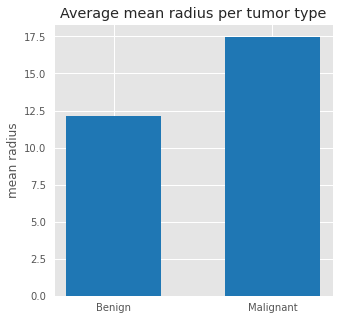

In [4]:
with plt.style.context(("seaborn","ggplot")):
    avg_radius_per_tumor_typ = breast_cancer_df.groupby(by="Target").mean()[["mean radius"]]

    plt.figure(figsize=(5,5))
    plt.bar(avg_radius_per_tumor_typ.index,
            avg_radius_per_tumor_typ["mean radius"],
            color="tab:blue",
            width=0.6)
    plt.ylabel("mean radius")
    plt.title("Average mean radius per tumor type")

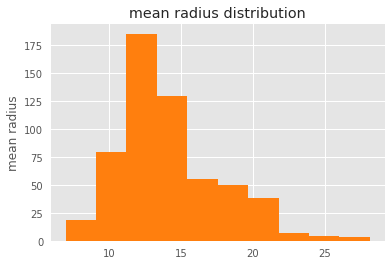

In [5]:
with plt.style.context(("seaborn","ggplot")):
    plt.figure(figsize=(6,4))
    plt.hist(breast_cancer_df["mean radius"], color="tab:orange", )
    plt.ylabel("mean radius")
    plt.title("mean radius distribution")


In [6]:
import matplotlib.gridspec as gridspec

def create_figure(plot1_f1,plot1_f2, plot2_f,plot3_f):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(10,8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums

        ## First Graph -  Scatter Plot
        color = {"Malignant" : "tab:red", "Benign":"tab:green"}
        for tumor_typ in breast_cancer_df["Target"].unique():
            ax1.scatter(breast_cancer_df[breast_cancer_df["Target"]==tumor_typ][plot1_f1],
                        breast_cancer_df[breast_cancer_df["Target"]==tumor_typ][plot1_f2],
                        c=color[tumor_typ],
                        s=200,
                        alpha=0.6,
                        label=tumor_typ)
        ax1.set_xlabel(plot1_f1)
        ax1.set_ylabel(plot1_f2)
        ax1.set_title("%s vs %s Scatter Plot"%(plot1_f1, plot1_f2))
        ax1.legend(title="Tumor Type",loc="best")

        ## Second Graph - Bar Chart
        avg_radius_per_tumor_typ = breast_cancer_df.groupby(by="Target").mean()[[plot2_f]]
        ax2.bar(avg_radius_per_tumor_typ.index,
                avg_radius_per_tumor_typ[plot2_f],
                color="tab:blue",
                width=0.6)
        ax2.set_ylabel(plot2_f)
        ax2.set_title("Average %s per tumor type"%(plot2_f))

        ## Third Graph - Histogram
        ax3.hist(breast_cancer_df[plot3_f], color="tab:orange", )
        ax3.set_ylabel(plot3_f)
        ax3.set_title("%s distribution"%(plot3_f))

        plt.close(fig)
        return fig

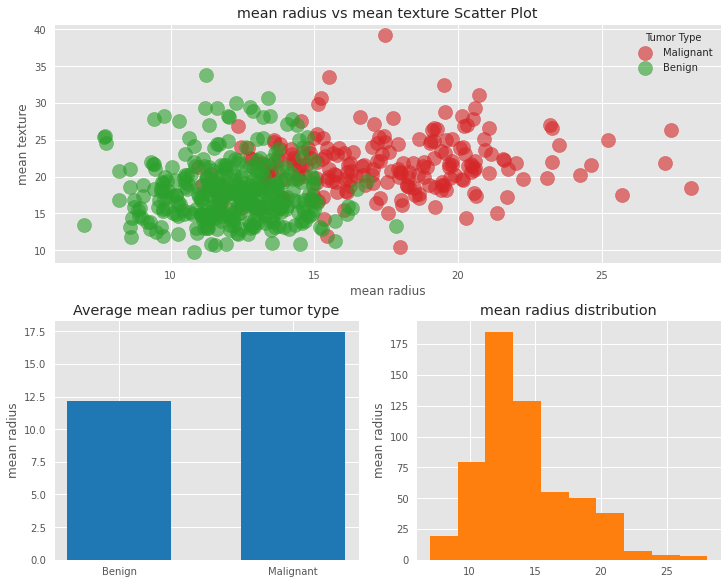

In [7]:
create_figure("mean radius", "mean texture", "mean radius", "mean radius")

Column
    [0] Column
        [0] DiscreteSlider(name='plot1_f1', options=['mean radius', ...], value='mean radius')
        [1] DiscreteSlider(name='plot1_f2', options=['mean radius', ...], value='mean radius')
        [2] DiscreteSlider(name='plot2_f', options=['mean radius', ...], value='mean radius')
        [3] DiscreteSlider(name='plot3_f', options=['mean radius', ...], value='mean radius')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00101')
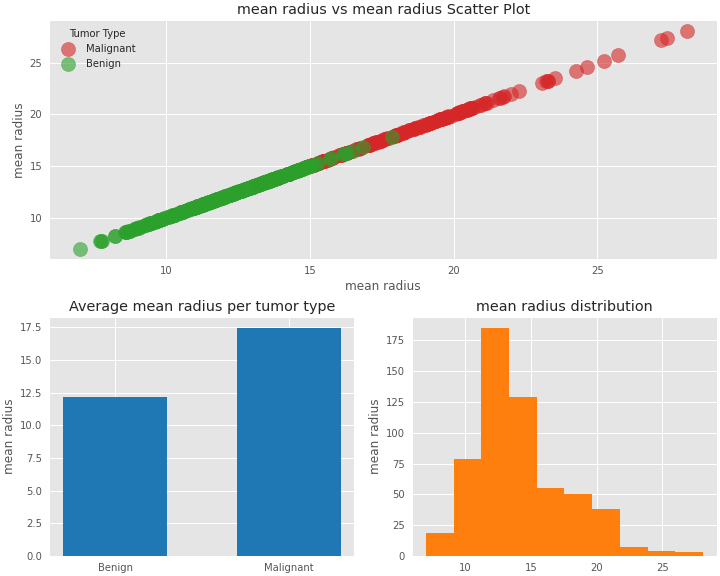

In [8]:
import panel as pn
pn.extension()

kw = dict(plot1_f1=breast_cancer.feature_names,
          plot1_f2=breast_cancer.feature_names,
          plot2_f=breast_cancer.feature_names,
          plot3_f=breast_cancer.feature_names)

dash1 = pn.interact(create_figure, **kw)
dash1

In [9]:
import panel.widgets as pnw

In [10]:
f1 = pnw.Select(options=list(breast_cancer.feature_names), name="Scatter Plot Feature 1")
f2 = pnw.Select(options=list(breast_cancer.feature_names), name="Scatter Plot Feature 2")
f3 = pnw.Select(options=list(breast_cancer.feature_names), name="Bar Chart Feature")
f4 = pnw.Select(options=list(breast_cancer.feature_names), name="Histogram Feature")

In [11]:
@pn.depends(f1.param.value,f2.param.value,f3.param.value,f4.param.value)
def create_dash(f1,f2,f3,f4):
    return create_figure(f1,f2,f3,f4)

Column
    [0] StaticText(align='center', value='<h3>Breast Cancer D...)
    [1] Row(align='center')
        [0] Select(name='Scatter Plot Feature 1', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Scatter Plot Feature 2', options=['mean radius', ...], value='mean radius')
    [2] Row(align='center')
        [0] Select(name='Bar Chart Feature', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Histogram Feature', options=['mean radius', ...], value='mean radius')
    [3] Row
        [0] ParamFunction(function)
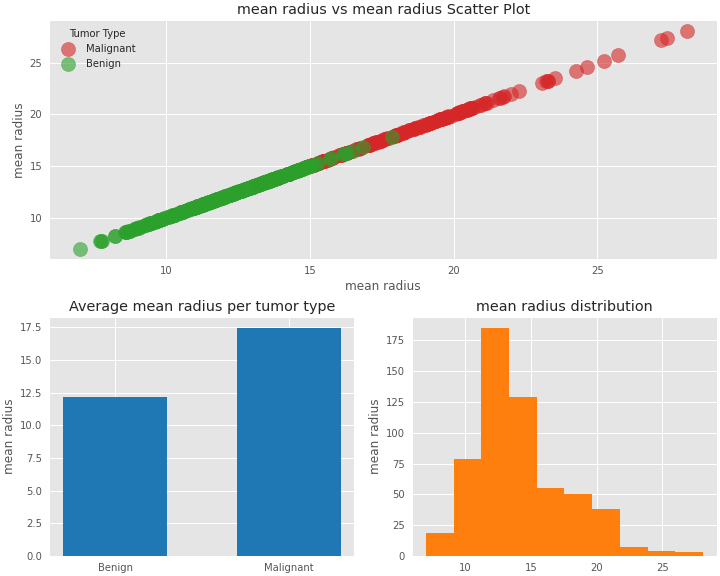

In [12]:
heading = "<h3>Breast Cancer Data Analysis Dashboard</h3>\nPlease feel free to try various combinations of parameters to analyze results from different angles"
text = pnw.StaticText(value=heading, align="center")

dash3 = pn.Column(
                    text,
                    pn.Row(f1,f2, align="center"),
                    pn.Row(f3,f4, align="center"),
                    pn.Row(create_dash)
                )
dash3

# simulate_golf_scores here

In [45]:
import numpy as np
golf_hole_scores=np.random.randint(3,6,size=(50,9))


In [46]:
golf_hole_scores

array([[4, 4, 3, 5, 5, 4, 4, 4, 3],
       [4, 3, 4, 4, 3, 4, 4, 4, 5],
       [3, 3, 5, 5, 4, 4, 4, 4, 4],
       [5, 5, 3, 5, 3, 5, 3, 4, 5],
       [4, 4, 3, 3, 5, 4, 3, 3, 5],
       [3, 5, 5, 5, 3, 5, 5, 5, 3],
       [3, 5, 5, 4, 4, 3, 5, 5, 4],
       [3, 4, 3, 5, 4, 5, 4, 4, 5],
       [5, 4, 3, 3, 3, 5, 4, 4, 4],
       [4, 4, 3, 3, 4, 4, 3, 5, 5],
       [4, 4, 5, 5, 4, 3, 5, 4, 3],
       [3, 4, 4, 4, 5, 4, 3, 5, 4],
       [5, 3, 3, 5, 4, 5, 4, 3, 3],
       [3, 3, 4, 4, 3, 3, 5, 4, 3],
       [5, 4, 4, 5, 5, 4, 5, 5, 3],
       [5, 5, 4, 5, 3, 3, 5, 4, 5],
       [4, 3, 5, 4, 3, 4, 4, 5, 3],
       [5, 3, 4, 5, 5, 5, 5, 5, 4],
       [3, 5, 4, 3, 4, 5, 3, 5, 4],
       [3, 3, 4, 4, 4, 5, 3, 4, 3],
       [3, 4, 3, 5, 5, 3, 3, 3, 4],
       [3, 4, 3, 4, 4, 4, 3, 4, 5],
       [3, 4, 3, 4, 4, 3, 3, 4, 4],
       [5, 5, 5, 4, 5, 4, 5, 5, 3],
       [4, 3, 5, 3, 5, 3, 3, 5, 3],
       [4, 3, 3, 4, 3, 5, 3, 5, 5],
       [4, 5, 3, 5, 4, 5, 5, 4, 3],
       [5, 4, 4, 5, 3, 5, 4,

In [47]:
scores = golf_hole_scores.sum(axis=1)
scores

array([36, 35, 36, 38, 34, 39, 38, 37, 35, 35, 37, 36, 35, 32, 40, 39, 35,
       41, 36, 33, 33, 34, 32, 41, 34, 35, 38, 39, 37, 39, 40, 36, 38, 35,
       36, 40, 33, 31, 39, 34, 37, 36, 34, 34, 31, 34, 40, 37, 32, 37])

In [48]:
y=scores
x = np.arange(1, y.shape[0]+1)

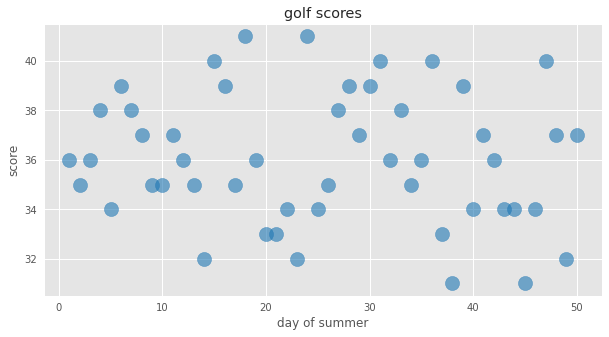

In [49]:
with plt.style.context(("seaborn","ggplot")):
    color = {"Malignant" : "tab:red", "Benign":"tab:green"}
    plt.figure(figsize=(10,5))
    plt.scatter(x,y,
                    c="tab:blue",
                    s=200,
                    alpha=0.6,
                    label='9 hole scores')
    plt.xlabel("day of summer")
    plt.ylabel("score")
    plt.title("golf scores")
#     plt.legend(title="Tumor Type",loc="best")

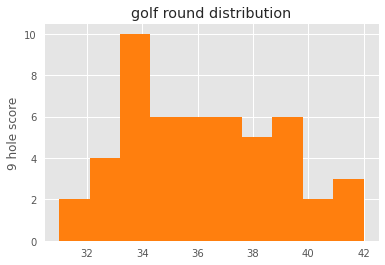

In [18]:
with plt.style.context(("seaborn","ggplot")):
    plt.figure(figsize=(6,4))
    plt.hist(y, color="tab:orange", )
    plt.ylabel("9 hole score")
    plt.title("golf round distribution")

In [19]:
golf_18_hole_scores = np.array([76,84,80,74,87,67,75,78,76,77,75,80,77,74,71,74])

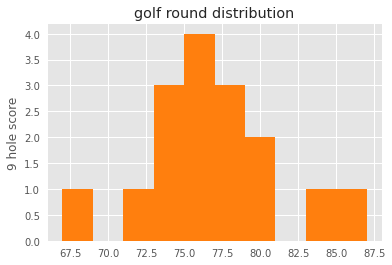

In [20]:
with plt.style.context(("seaborn","ggplot")):
    plt.figure(figsize=(6,4))
    plt.hist(golf_18_hole_scores, color="tab:orange", )
    plt.ylabel("9 hole score")
    plt.title("golf round distribution")

In [21]:
golf_18_hole_scores.mean()

76.5625

In [22]:
golf_18_hole_scores.std()

4.595769114087434

# so 76  plus or minus 5 shots

In [23]:
import matplotlib.pyplot as plt

def plot_x_y_no_warning(x,y):
    '''
    HEY --> *plot_x_y_no_warning* - only sets ths color once
    plots an x and y on a simple line graph
    plots with a star '*' marker that is quite big
    '''
    # plotting
    plt.figure(figsize=(10*1.5, 5*1.5))
    plt.title("league golf scores")
    #plt.title("Line graph")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.plot(x, y, '-g*', markersize=20)
    plt.show()
    

In [24]:
scores = golf_18_hole_scores
scores

array([76, 84, 80, 74, 87, 67, 75, 78, 76, 77, 75, 80, 77, 74, 71, 74])

In [25]:
y=scores
x = np.arange(1, y.shape[0]+1)

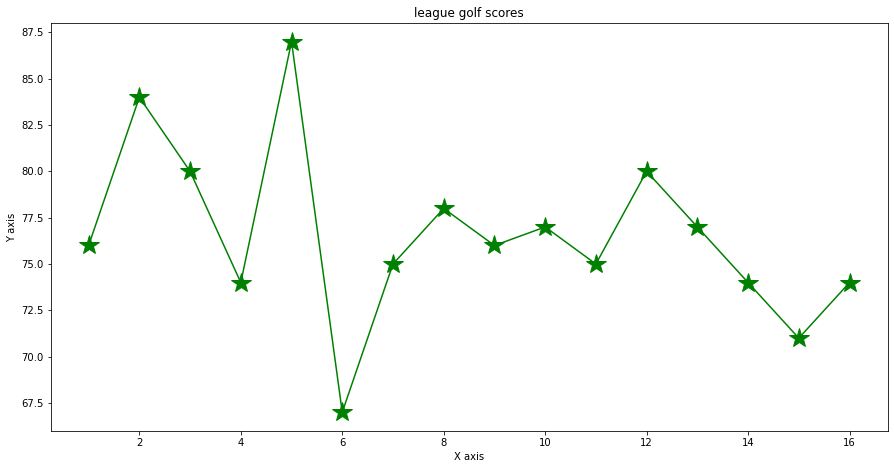

In [26]:
plot_x_y_no_warning(x,y)

# at the beginning of the season very inconsistent

In [27]:
# sort and remove oulier min and max

In [28]:
mylist = golf_18_hole_scores
mylist.sort() 
trimmed = mylist[1:-1] 
trimmed


array([71, 74, 74, 74, 75, 75, 76, 76, 77, 77, 78, 80, 80, 84])

In [29]:
trimmed.mean()

76.5

In [30]:
trimmed.std()

3.1339158526400435

In [31]:
best_scores_typical = trimmed.mean() - trimmed.std()
best_scores_typical

73.36608414735996

In [32]:
worst_scores_typical = trimmed.mean() + trimmed.std()
worst_scores_typical

79.63391585264004

In [33]:
golf_18_hole_scores

array([67, 71, 74, 74, 74, 75, 75, 76, 76, 77, 77, 78, 80, 80, 84, 87])

# toss 4 scores

In [34]:
mylist = golf_18_hole_scores
mylist.sort() 
trimmed = mylist[2:-2] 
trimmed

array([74, 74, 74, 75, 75, 76, 76, 77, 77, 78, 80, 80])

In [35]:
trimmed.mean()

76.33333333333333

In [36]:
trimmed.std()

2.0548046676563256

In [37]:
best_scores_typical = trimmed.mean() - trimmed.std()
best_scores_typical

74.278528665677

In [38]:
worst_scores_typical = trimmed.mean() + trimmed.std()
worst_scores_typical

78.38813800098966

# flip it to look like i am improving and getting more consistent

In [39]:
y=trimmed[::-1]
x = np.arange(1, y.shape[0]+1)

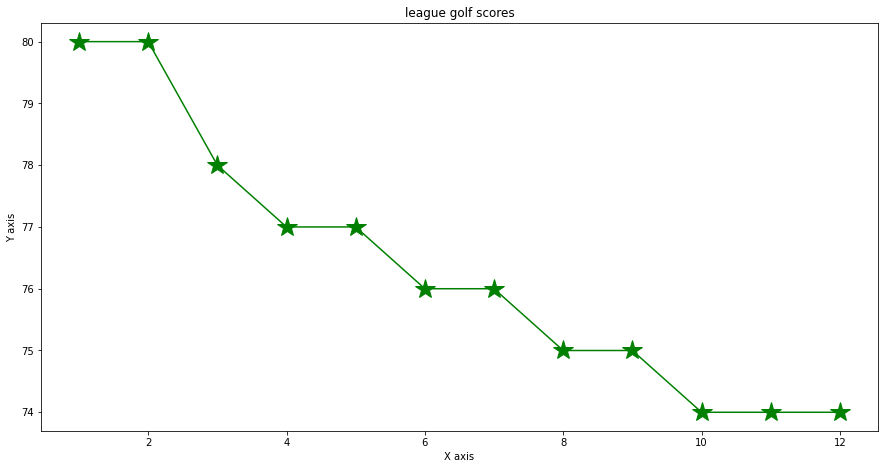

In [40]:
plot_x_y_no_warning(x,y)

In [41]:
y=trimmed[::-1]
y=np.unique(y)
y=y[::-1]
x = np.arange(1, y.shape[0]+1)

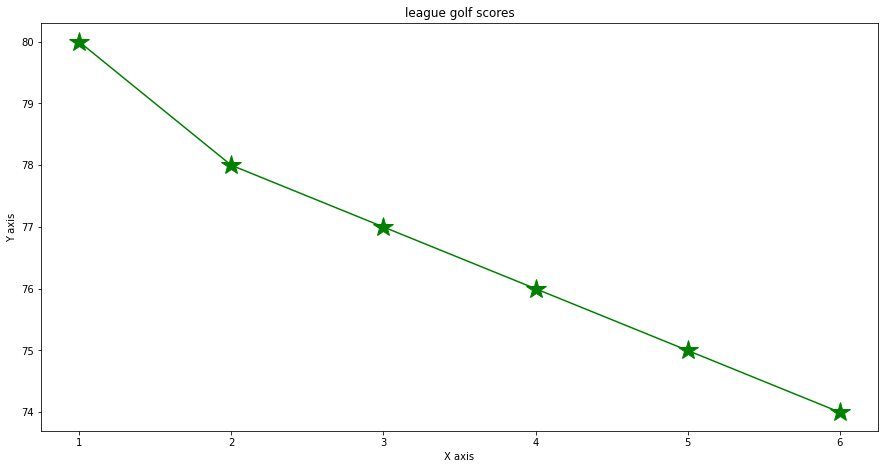

In [42]:
plot_x_y_no_warning(x,y)

In [52]:
golf_18_hole_scores = np.array([76,84,80,74,87,67,75,78,76,77,75,80,77,74,71,74])
scores = golf_18_hole_scores
y=scores
x = np.arange(1, y.shape[0]+1)

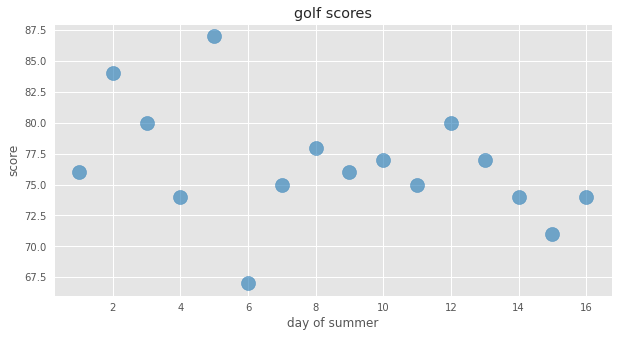

In [53]:
with plt.style.context(("seaborn","ggplot")):
    color = {"Malignant" : "tab:red", "Benign":"tab:green"}
    plt.figure(figsize=(10,5))
    plt.scatter(x,y,
                    c="tab:blue",
                    s=200,
                    alpha=0.6,
                    label='9 hole scores')
    plt.xlabel("day of summer")
    plt.ylabel("score")
    plt.title("golf scores")
#     plt.legend(title="Tumor Type",loc="best")

In [59]:
my_np_arr = np.vstack((x,y))

In [62]:
arr = my_np_arr.transpose()

In [63]:
arr

array([[ 1, 76],
       [ 2, 84],
       [ 3, 80],
       [ 4, 74],
       [ 5, 87],
       [ 6, 67],
       [ 7, 75],
       [ 8, 78],
       [ 9, 76],
       [10, 77],
       [11, 75],
       [12, 80],
       [13, 77],
       [14, 74],
       [15, 71],
       [16, 74]])

In [64]:
arr[0,1]

76

In [70]:
df0 = pd.DataFrame(arr, columns=['x', 'y'])

In [71]:
df0.head()

,x,y
0,1,76
1,2,84
2,3,80
3,4,74
4,5,87


In [72]:
df1 = pd.DataFrame(arr, columns=['Day', 'Golf_Score'])

In [73]:
df1

,Day,Golf_Score
0,1,76
1,2,84
2,3,80
3,4,74
4,5,87
5,6,67
6,7,75
7,8,78
8,9,76
9,10,77


In [76]:
#! conda install -y seaborn

In [78]:
import seaborn as sns

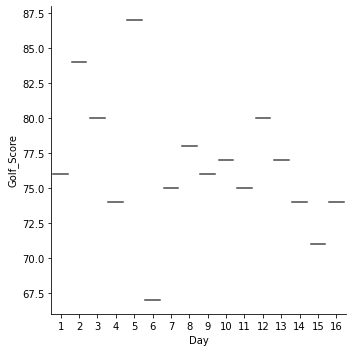

In [79]:
sns.catplot(x='Day',y='Golf_Score', data=df1, kind="violin")

In [81]:
df1['Wind'] = np.where(df1['Golf_Score']>= 80, 25, 10)
df1.head()

,Day,Golf_Score,Wind
0,1,76,10
1,2,84,25
2,3,80,25
3,4,74,10
4,5,87,25


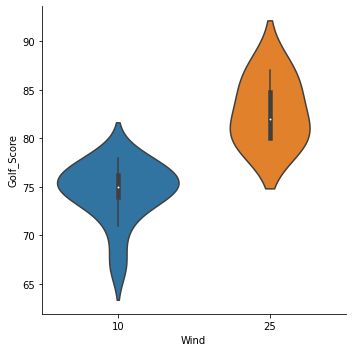

In [82]:
sns.catplot(x='Wind',y='Golf_Score', data=df1, kind="violin")

In [83]:
df1.shape

(16, 3)

In [86]:
!ls

1_plot_with_panel_cancer_relationships_plot_golf_scores_simulated_and_real.ipynb
golf_courses_great_life.csv


In [87]:
gl_df = pd.read_csv('golf_courses_great_life.csv')

In [88]:
gl_df.shape

(21, 2)

In [89]:
gl_df

,Golf_Course,Event_format
0,Central Valley,4-Person Best ball -Count 2
1,Willow Run,2-Person Modified Chapman
2,Rocky Run,2-Person Scramble
3,Bakker Crossing,2-Person Stableford
4,Willow Run,Senior Low Gross & Super Senior Low Gross
5,Worthington,4-Person Bridgemans Best Ball
6,Rocky Run,1man-scramble
7,Fox Run,Cries - Drop worst 6 holes
8,Bakker Crossing,2-Person Best Ball
9,Central Valley,Low Gross


In [92]:
df=gl_df
df.drop(df.index[df['Event_format'].str.contains('Scramble')], inplace=True)

In [93]:
df

,Golf_Course,Event_format
0,Central Valley,4-Person Best ball -Count 2
1,Willow Run,2-Person Modified Chapman
3,Bakker Crossing,2-Person Stableford
4,Willow Run,Senior Low Gross & Super Senior Low Gross
5,Worthington,4-Person Bridgemans Best Ball
6,Rocky Run,1man-scramble
7,Fox Run,Cries - Drop worst 6 holes
8,Bakker Crossing,2-Person Best Ball
9,Central Valley,Low Gross
10,Worthington,4-Person Lawrence Welk Best Ball


In [94]:
df.shape

(18, 2)

In [96]:
df.drop(index=18, inplace=True)

In [97]:
df

,Golf_Course,Event_format
0,Central Valley,4-Person Best ball -Count 2
1,Willow Run,2-Person Modified Chapman
3,Bakker Crossing,2-Person Stableford
4,Willow Run,Senior Low Gross & Super Senior Low Gross
5,Worthington,4-Person Bridgemans Best Ball
6,Rocky Run,1man-scramble
7,Fox Run,Cries - Drop worst 6 holes
8,Bakker Crossing,2-Person Best Ball
9,Central Valley,Low Gross
10,Worthington,4-Person Lawrence Welk Best Ball


In [100]:
df.loc[19]['Golf_Course'] = 'Fox Run'

In [101]:
df

,Golf_Course,Event_format
0,Central Valley,4-Person Best ball -Count 2
1,Willow Run,2-Person Modified Chapman
3,Bakker Crossing,2-Person Stableford
4,Willow Run,Senior Low Gross & Super Senior Low Gross
5,Worthington,4-Person Bridgemans Best Ball
6,Rocky Run,1man-scramble
7,Fox Run,Cries - Drop worst 6 holes
8,Bakker Crossing,2-Person Best Ball
9,Central Valley,Low Gross
10,Worthington,4-Person Lawrence Welk Best Ball


In [102]:
df.loc[20]['Golf_Course'] = 'Willow Run'

# they changed the last two events because of weather - rain? - sogginess

In [103]:
df

,Golf_Course,Event_format
0,Central Valley,4-Person Best ball -Count 2
1,Willow Run,2-Person Modified Chapman
3,Bakker Crossing,2-Person Stableford
4,Willow Run,Senior Low Gross & Super Senior Low Gross
5,Worthington,4-Person Bridgemans Best Ball
6,Rocky Run,1man-scramble
7,Fox Run,Cries - Drop worst 6 holes
8,Bakker Crossing,2-Person Best Ball
9,Central Valley,Low Gross
10,Worthington,4-Person Lawrence Welk Best Ball


In [104]:
df.shape

(17, 2)

In [105]:
df.loc[14]['Golf_Course'] = 'Willow Run'

In [106]:
df.loc[14]['Event_format'] = 'Low Gross'

In [107]:
df

,Golf_Course,Event_format
0,Central Valley,4-Person Best ball -Count 2
1,Willow Run,2-Person Modified Chapman
3,Bakker Crossing,2-Person Stableford
4,Willow Run,Senior Low Gross & Super Senior Low Gross
5,Worthington,4-Person Bridgemans Best Ball
6,Rocky Run,1man-scramble
7,Fox Run,Cries - Drop worst 6 holes
8,Bakker Crossing,2-Person Best Ball
9,Central Valley,Low Gross
10,Worthington,4-Person Lawrence Welk Best Ball


In [108]:
df.drop(index=11, inplace=True)

In [109]:
df

,Golf_Course,Event_format
0,Central Valley,4-Person Best ball -Count 2
1,Willow Run,2-Person Modified Chapman
3,Bakker Crossing,2-Person Stableford
4,Willow Run,Senior Low Gross & Super Senior Low Gross
5,Worthington,4-Person Bridgemans Best Ball
6,Rocky Run,1man-scramble
7,Fox Run,Cries - Drop worst 6 holes
8,Bakker Crossing,2-Person Best Ball
9,Central Valley,Low Gross
10,Worthington,4-Person Lawrence Welk Best Ball


In [110]:
df.shape

(16, 2)

In [115]:
df.reset_index(drop=True, inplace=True)

In [116]:
df

,Golf_Course,Event_format
0,Central Valley,4-Person Best ball -Count 2
1,Willow Run,2-Person Modified Chapman
2,Bakker Crossing,2-Person Stableford
3,Willow Run,Senior Low Gross & Super Senior Low Gross
4,Worthington,4-Person Bridgemans Best Ball
5,Rocky Run,1man-scramble
6,Fox Run,Cries - Drop worst 6 holes
7,Bakker Crossing,2-Person Best Ball
8,Central Valley,Low Gross
9,Worthington,4-Person Lawrence Welk Best Ball


In [117]:
golf_df = pd.concat([df1,df], axis=1)

In [118]:
golf_df

,Day,Golf_Score,Wind,Golf_Course,Event_format
0,1,76,10,Central Valley,4-Person Best ball -Count 2
1,2,84,25,Willow Run,2-Person Modified Chapman
2,3,80,25,Bakker Crossing,2-Person Stableford
3,4,74,10,Willow Run,Senior Low Gross & Super Senior Low Gross
4,5,87,25,Worthington,4-Person Bridgemans Best Ball
5,6,67,10,Rocky Run,1man-scramble
6,7,75,10,Fox Run,Cries - Drop worst 6 holes
7,8,78,10,Bakker Crossing,2-Person Best Ball
8,9,76,10,Central Valley,Low Gross
9,10,77,10,Worthington,4-Person Lawrence Welk Best Ball


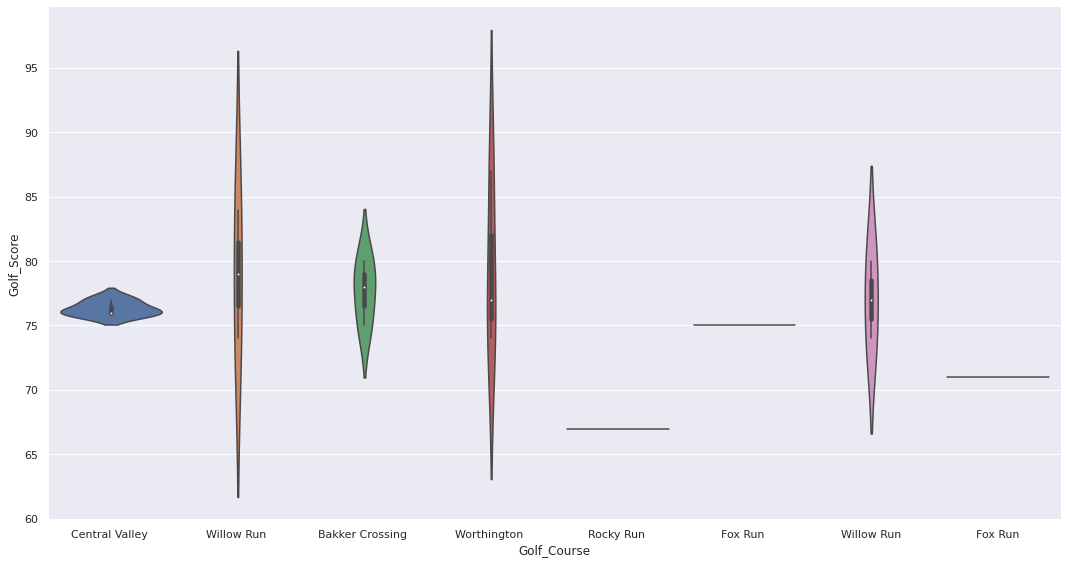

In [129]:
sns.catplot(x='Golf_Course',y='Golf_Score', data=golf_df, kind="violin", height=8, aspect=15/8)

In [130]:
course = golf_df['Golf_Course'].values

In [131]:
course

array(['Central Valley ', 'Willow Run ', 'Bakker Crossing ',
       'Willow Run ', 'Worthington ', 'Rocky Run ', 'Fox Run ',
       'Bakker Crossing ', 'Central Valley ', 'Worthington ',
       'Bakker Crossing ', 'Willow Run', 'Central Valley ',
       'Worthington ', 'Fox Run', 'Willow Run'], dtype=object)

In [133]:
golf_df['Golf_Course'] = golf_df['Golf_Course'].str.strip()

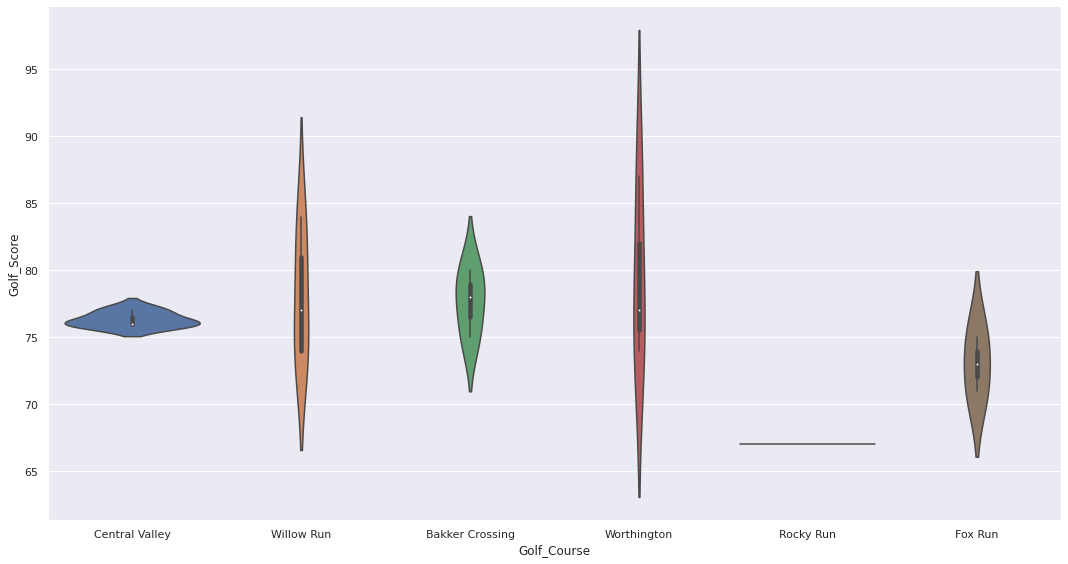

In [134]:
sns.catplot(x='Golf_Course',y='Golf_Score', data=golf_df, kind="violin", height=8, aspect=15/8)

<AxesSubplot:>

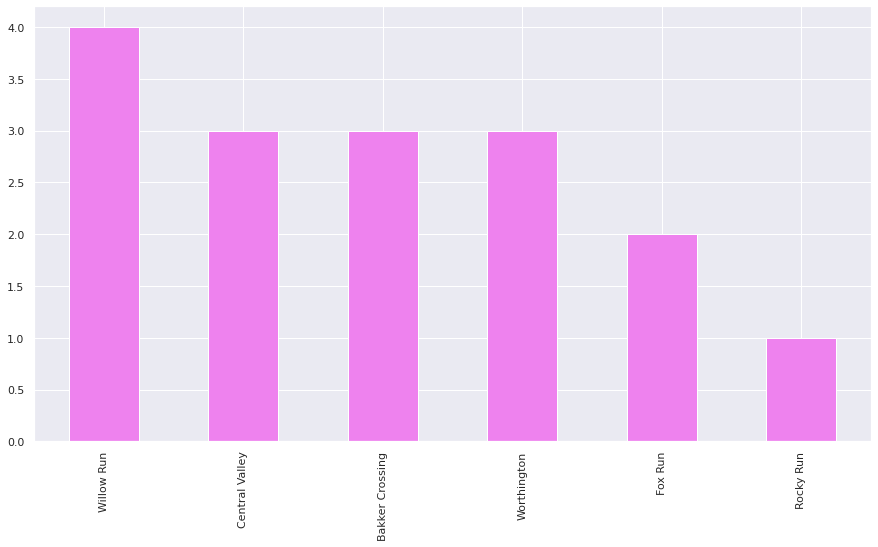

In [136]:
golf_df.Golf_Course.value_counts().plot(kind='bar', color='violet')